In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv("/home/jacob/test_root/jacob_home_work/datacongo.csv")  # Mets ici le chemin de ton fichier

# 2. Afficher les premières lignes pour vérifier
print("Aperçu du dataset :")
print(df.head())

Aperçu du dataset :
                        Country Name Country Code  \
0  Congo, République démocratique du          COD   
1  Congo, République démocratique du          COD   
2  Congo, République démocratique du          COD   
3  Congo, République démocratique du          COD   
4  Congo, République démocratique du          COD   

                                      Indicator Name     Indicator Code  1960  \
0     Intentional homicides, male (per 100,000 male)  VC.IHR.PSRC.MA.P5   NaN   
1   Décès survenus à la guerre (nombre de personnes)        VC.BTL.DETH   NaN   
2          Voice and Accountability: Percentile Rank         VA.PER.RNK   NaN   
3  Services de transports (% des exportations de ...  TX.VAL.TRAN.ZS.WT   NaN   
4  Informatique, communications et autres service...  TX.VAL.OTHR.ZS.WT   NaN   

   1961  1962  1963  1964  1965  ...        2015        2016         2017  \
0   NaN   NaN   NaN   NaN   NaN  ...         NaN         NaN          NaN   
1   NaN   NaN   NaN 

In [3]:
# Supprimer les colonnes inutiles (optionnel)
#df = df.drop(columns=["Unnamed: 0"])


# Supprimer les lignes qui ont des valeurs manquantes uniquement dans les colonnes d'années
df = df.dropna(subset=["2000", "2010", "2019", "2020"], how="any")


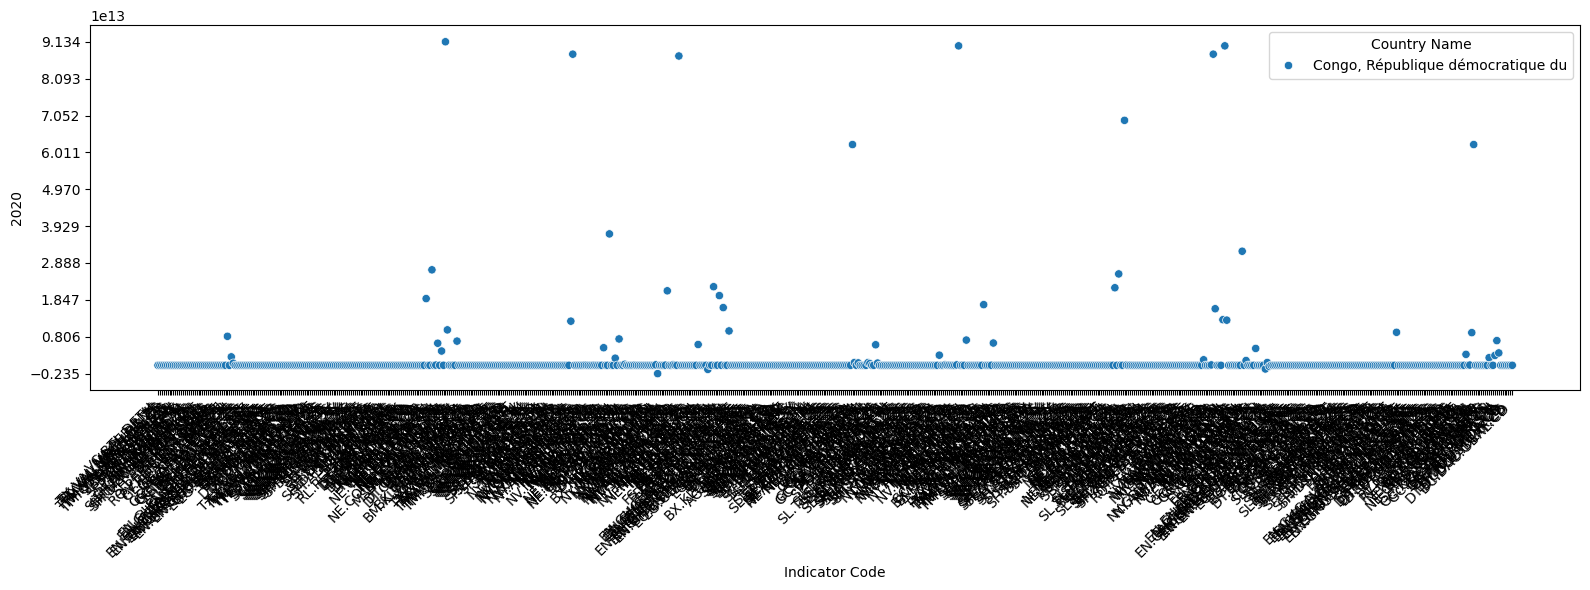

In [4]:
plt.figure(figsize=(16, 6))
sb.scatterplot(x=df['Indicator Code'], y=df['2020'], hue=df['Country Name'])
plt.xticks(rotation=45, ha='right')

# Définir des graduations régulières sur l'axe y
y_min = df['2020'].min()
y_max = df['2020'].max()
plt.yticks(np.linspace(y_min, y_max, num=10))  # 10 graduations régulières

plt.tight_layout()
plt.show()

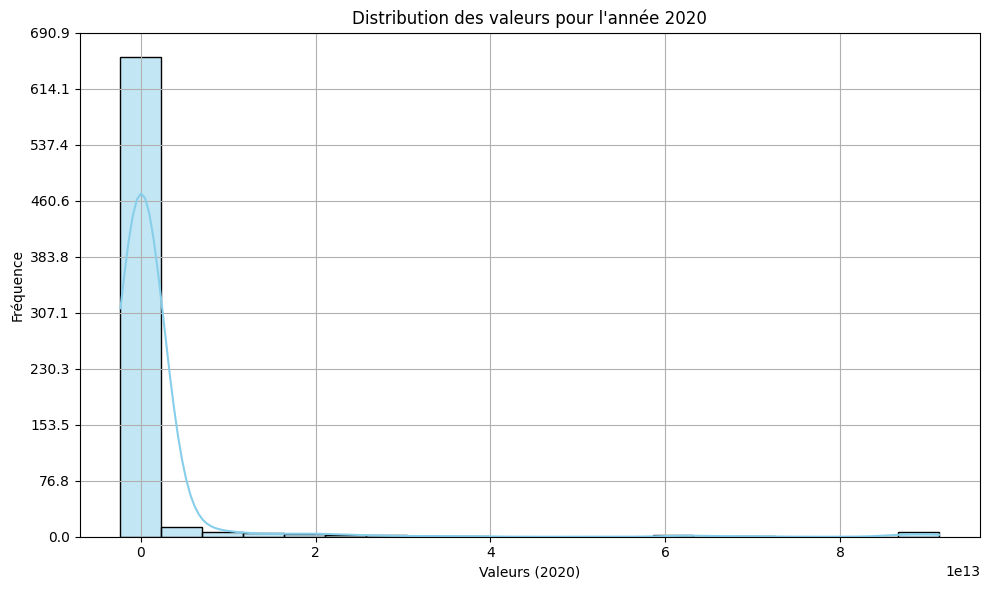

In [5]:
# Supprimer les valeurs manquantes
df = df[df['2020'].notna()]

# Tracer un histogramme de la distribution des valeurs pour l'année 2019
plt.figure(figsize=(10, 6))
sb.histplot(data=df, x='2020', bins=20, kde=True, color='skyblue')  # `kde=True` ajoute une courbe de densité

# Ajouter des graduations régulières sur l'axe Y
y_min, y_max = plt.ylim()
plt.yticks(np.linspace(y_min, y_max, num=10))

# Titre et labels
plt.title("Distribution des valeurs pour l'année 2020")
plt.xlabel("Valeurs (2020)")
plt.ylabel("Fréquence")
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
# Filtrer les colonnes numériques (ex. : années)
df_na = df.select_dtypes(include='number')
df_na = df_na.dropna()  # pour supprimer les lignes incomplètes
# ou bien
df_na = df_na.fillna(0)  # pour remplacer les NaN par 0 (moins conseillé)

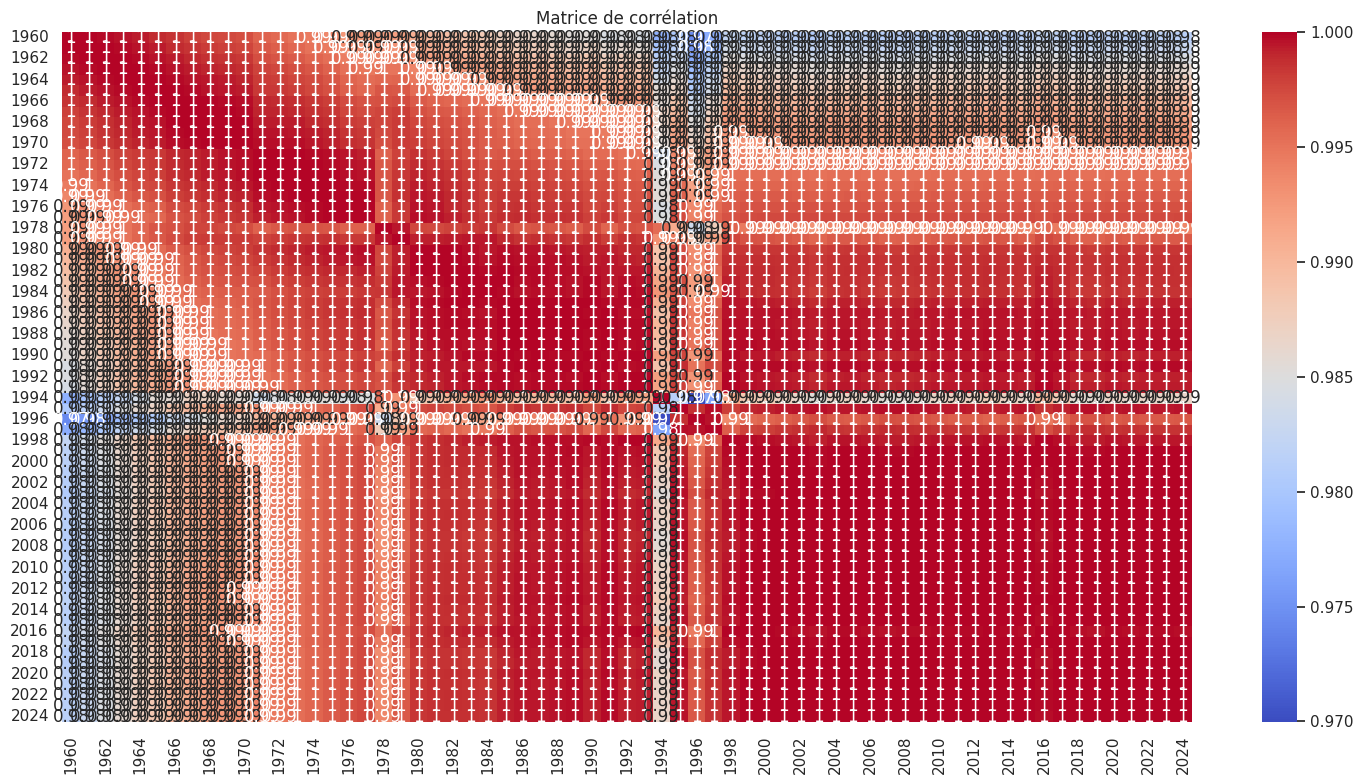

In [7]:
sb.set(rc={'figure.figsize': (15, 8)})
sb.heatmap(df_na.corr(), annot=True, cmap="coolwarm")

plt.title("Matrice de corrélation")
plt.tight_layout()
plt.show()


In [8]:
#print(df.columns.tolist())
#print(df.shape)
#print(df.info())
